In [1]:
import glob

import numpy             as np
import matplotlib.pyplot as plt

from CCfun  import in_range
from CCfun  import filter_df
from CCfun  import longer_than_exwl
from CCfun  import compute_baseline_float

from CCplot import plot1d
from CCplot import plot2d
from CCplot import plot_line
from CCplot import auto_plot_style
from CCplot import figure_sizes
from CCplot import subplots
from CCplot import set_ylimits

from CCdatabase import paper_signals
from CCdatabase import californication_irradiation_mapping

from CCio import load_many
from CCio import merge_measurements

In [2]:
%matplotlib inline

auto_plot_style()

In [3]:
%load_ext autoreload
%autoreload 2

# All data

In [4]:
filenames_pre  = glob.glob("/home/gonzalo/data/CC/Californication/*pre*.h5")
measurement    = load_many(filenames_pre)

In [5]:
#measurement.crystals.loc[measurement.crystals.looparound==True, "exp_index"] += 8
measurement.crystals.head()

looparound  crystal  grating  exp_index  slit_width  state  exposure  \
0       False        7        2          0        1000    516       0.1   
1       False        7        2          0        1000    516       0.1   
2       False        7        2          0        1000    516       0.1   
3       False        7        2          0        1000    516       0.1   
4       False        7        2          0        1000    516       0.1   

   ex_wl     power   em_wl  counts crystal_id crystal_type  bkgsub   rate  \
0  275.0  0.000008  287.75    3228  Sp_B1_004           Sp   -58.0 -580.0   
1  275.0  0.000008  288.25    3232  Sp_B1_004           Sp   -54.0 -540.0   
2  275.0  0.000008  288.75    3211  Sp_B1_004           Sp   -75.0 -750.0   
3  275.0  0.000008  289.50    3222  Sp_B1_004           Sp   -64.0 -640.0   
4  275.0  0.000008  290.00    3209  Sp_B1_004           Sp   -77.0 -770.0   

        quantar       dquanta  wheel_no  
0  1.104294e+15 -5.252226e-13         0  
1  1.104294e+15 -4.890003e-13         0  
2  1.104294e+15 -6.791671e-13         0  
3  1.104294e+15 -5.795559e-13         0  
4  1.104294e+15 -6.972783e-13         0

In [6]:
def plot_bleach(crystal_type, ex_wl, xrange, **overrides):
    grating = 1 + int(ex_wl >= 400)
    selections = dict(crystal_type = crystal_type,
                      ex_wl        =        ex_wl,
                      exposure     =            1,
                      grating      =      grating,
                      slit_width   =         1000)

    selections.update(overrides)

    gb       = filter_df(measurement.crystals, selections).groupby("crystal_id")
    crystals = set(list(gb.groups.keys()))
    n        = len(crystals)
    heights  = {}
    
    plt.figure(figsize=figure_sizes[n])
    for k, crystal_id in enumerate(crystals, start=1):
        exposures  = gb.get_group(crystal_id)
        exposures  = longer_than_exwl(exposures)
        heights[crystal_id] = {False: {}, True:{}}
        
        plt.subplot(*subplots[n], k)
        for (looparound, exp_index), sig in exposures.groupby(["looparound", "exp_index"]):
            x = sig.em_wl  .values
            y = sig.dquanta.values
            y = y - compute_baseline_float(y)

            window = in_range(x, *xrange)
            heights[crystal_id][looparound][exp_index] = y[window].max()
            plot1d(x, y,
                   label  = str(looparound) + " " + str(exp_index),
                   ylabel = "ph/ph/s"    ,
                   title  = crystal_id + " " + californication_irradiation_mapping[crystal_id],
                   color  = "b" if looparound else "k")

        for signal in paper_signals[crystal_type]:
            plot_line(signal, color="b", linestyle=":", label=f"{signal} nm CC")

        ex = ex_wl
        while ex < plt.xlim()[1]:
            plot_line(ex, color="g", linestyle=":")
            ex += ex_wl

        
        plt.legend()
    plt.tight_layout()

    plt.figure(figsize=figure_sizes[n])
    for k, (crystal_id, loops) in enumerate(heights.items(), start=1):
        plt.subplot(*subplots[n], k)
        all_data = []
        for looparound, peaks in loops.items():
            exps, hs = zip(*sorted(peaks.items()))
            #exps = [0, 10, 11, 12, 13]
            all_data.extend(hs)
            plt.scatter(exps, hs, label=str(looparound))
        plt.legend()
        plt.title(crystal_id)
        set_ylimits(all_data)

In [7]:
measurement.crystals.crystal_id.drop_duplicates()

0            Sp_B1_004
345600       Qz_B2_078
691200       Qz_B2_079
1036800     CaF_B1_292
2073600     BaF_B1_174
2841600     CaF_B1_281
3878400     CaF_B1_282
4915200     CaF_B1_289
5952000     CaF_B1_290
6988800     BaF_B1_170
7756800     BaF_B1_171
8524800     BaF_B1_172
9292800     BaF_B1_173
10060800     Sp_B2_036
10406400     Sp_B2_037
10752000     Sp_B2_038
11097600     Sp_B2_039
11443200     Qz_B2_073
11788800     Qz_B2_074
12134400     Qz_B2_076
12480000     Qz_B2_077
Name: crystal_id, dtype: object

# CaF

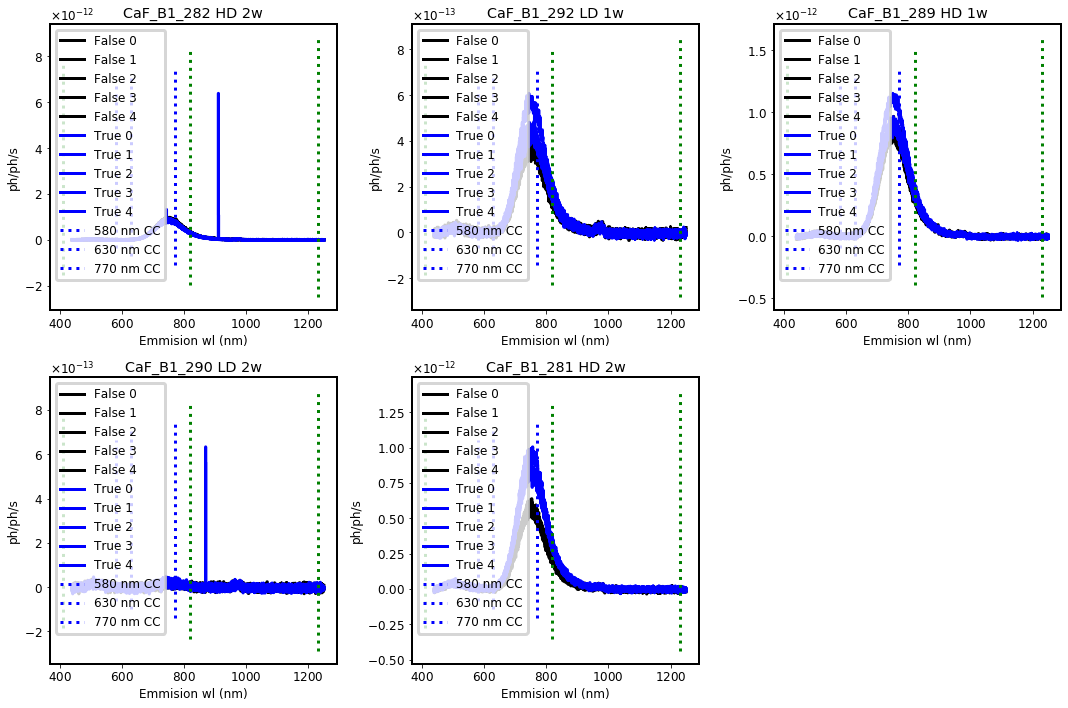

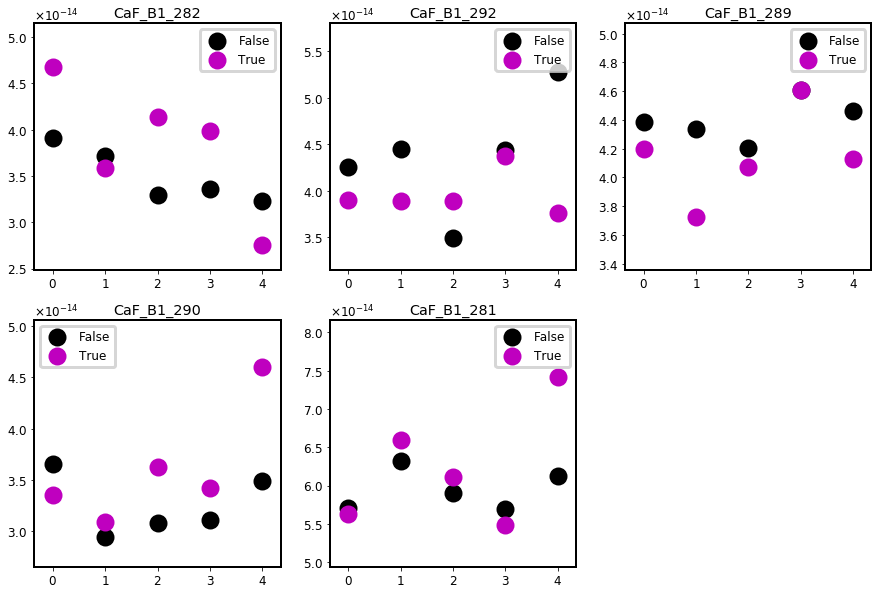

In [9]:
plot_bleach("CaF", 410, (400, 600))

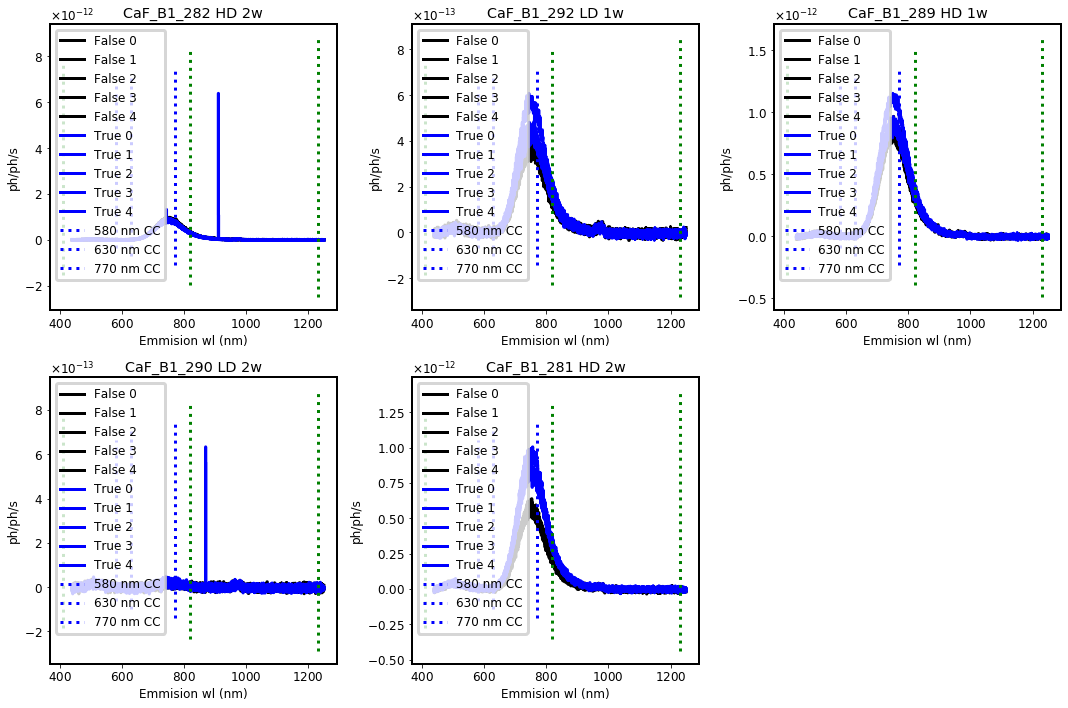

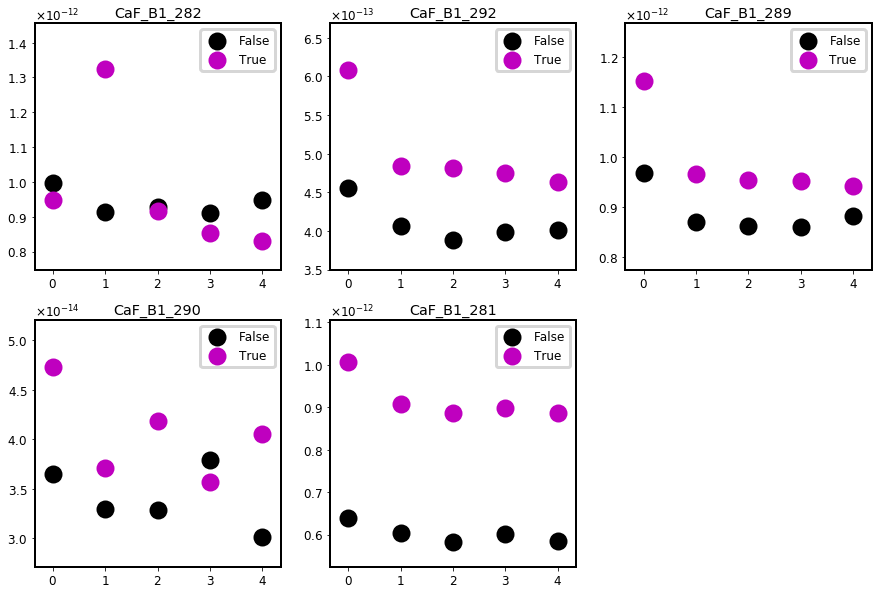

In [10]:
plot_bleach("CaF", 410, (650, 850))

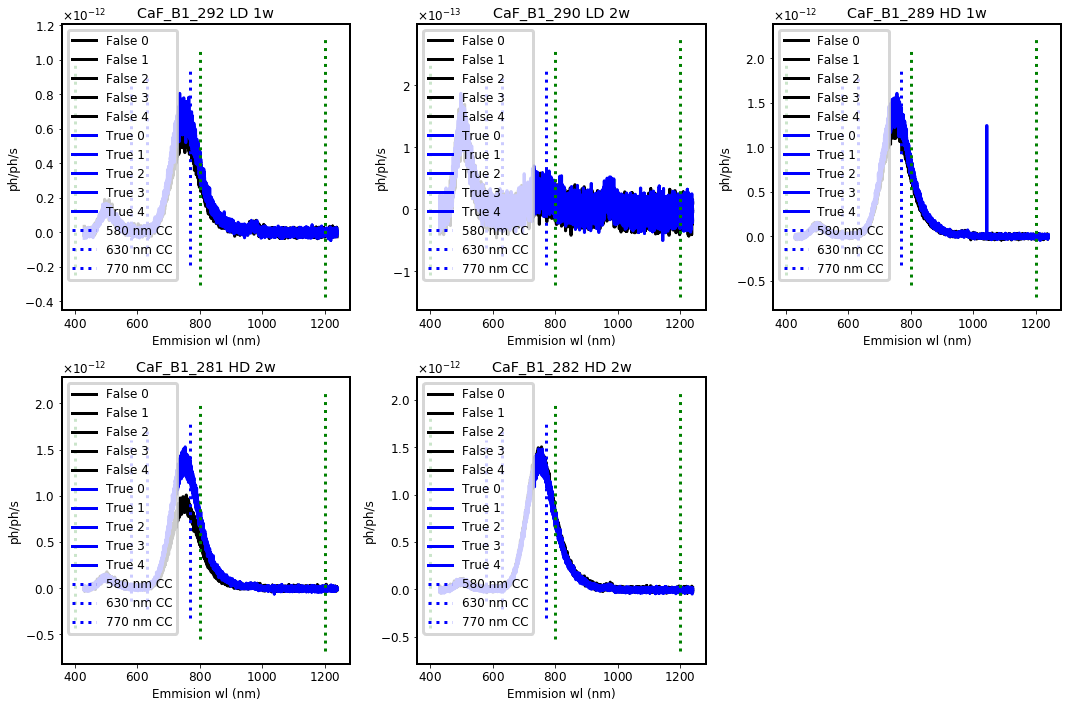

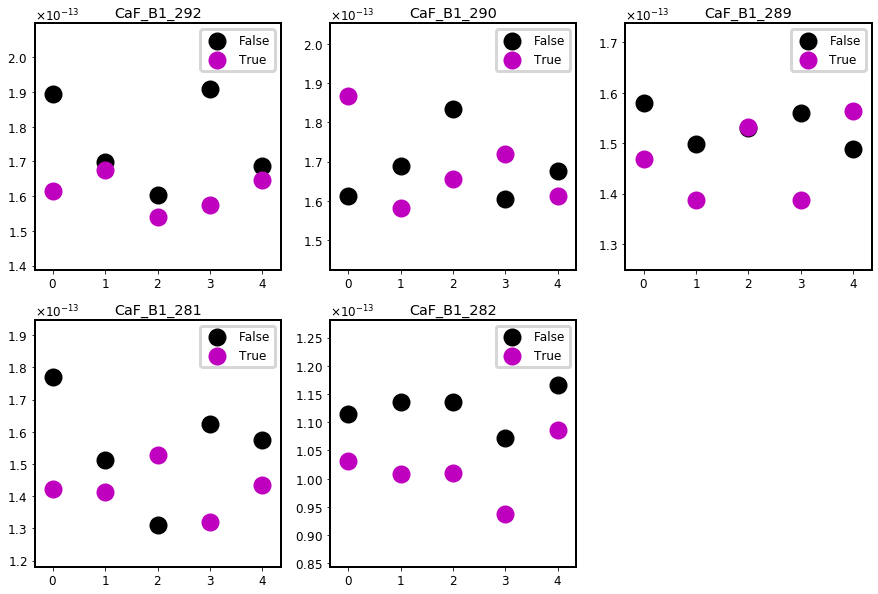

In [8]:
plot_bleach("CaF", 400, (400, 600))

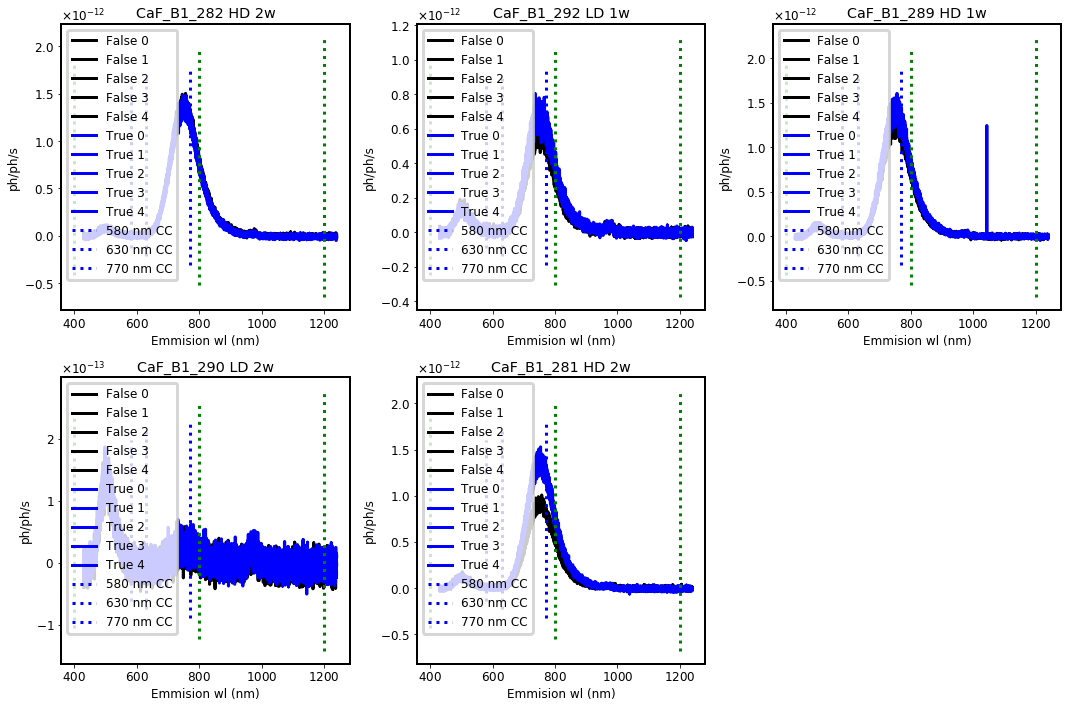

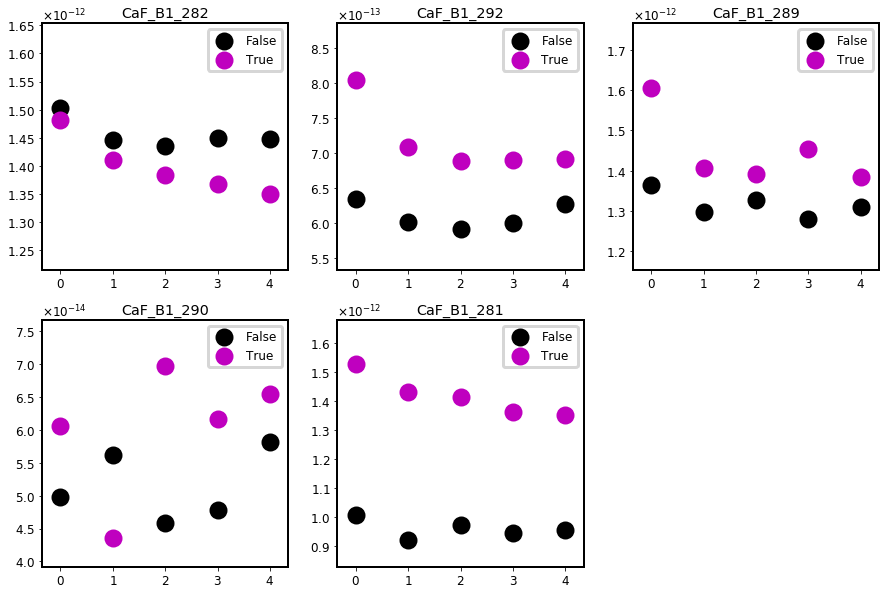

In [11]:
plot_bleach("CaF", 400, (650, 850))

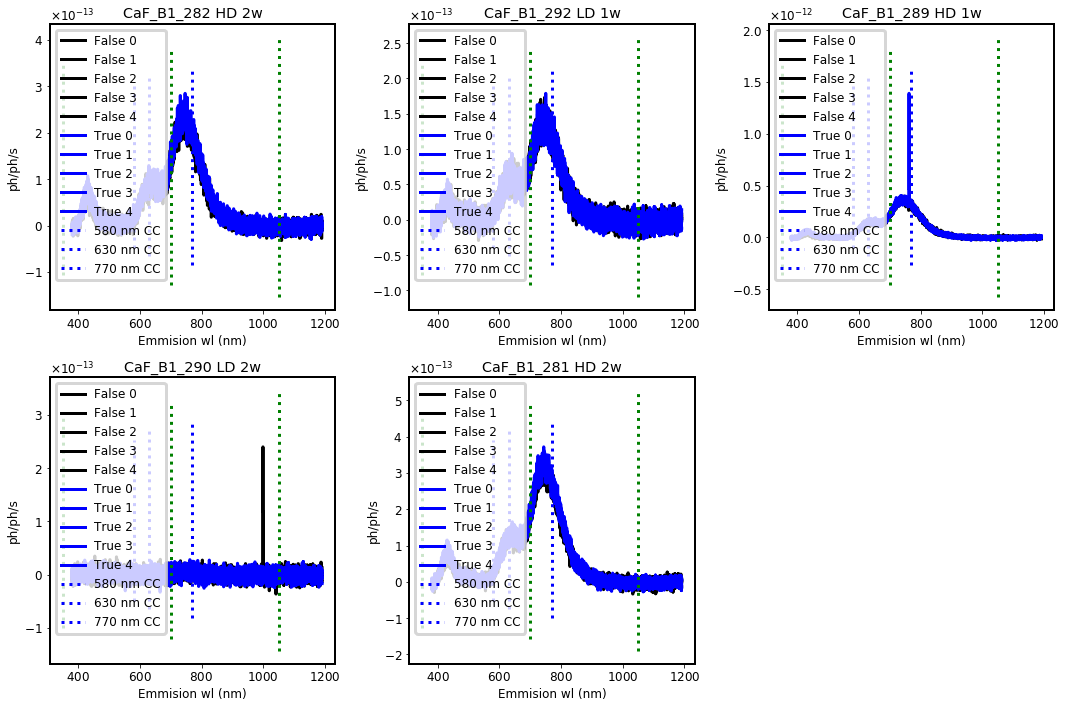

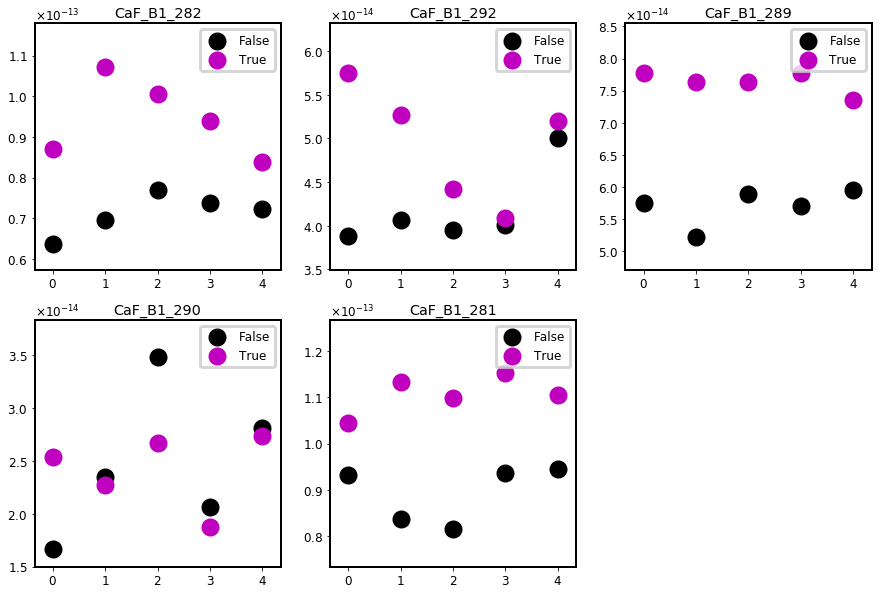

In [12]:
plot_bleach("CaF", 350, (350, 500))

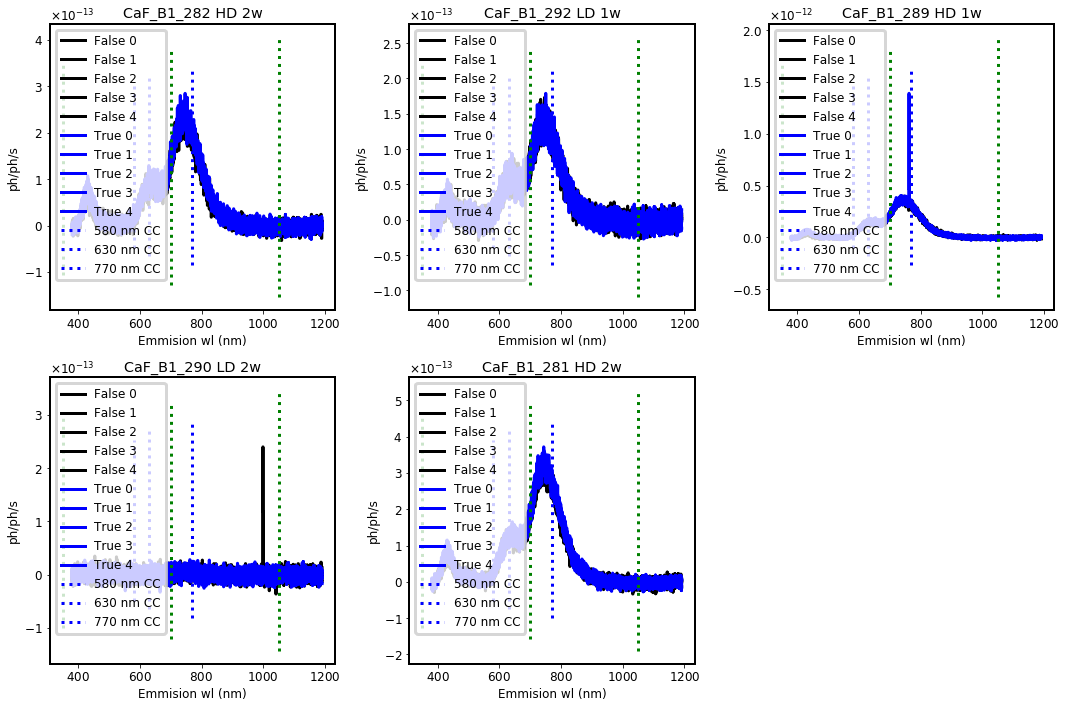

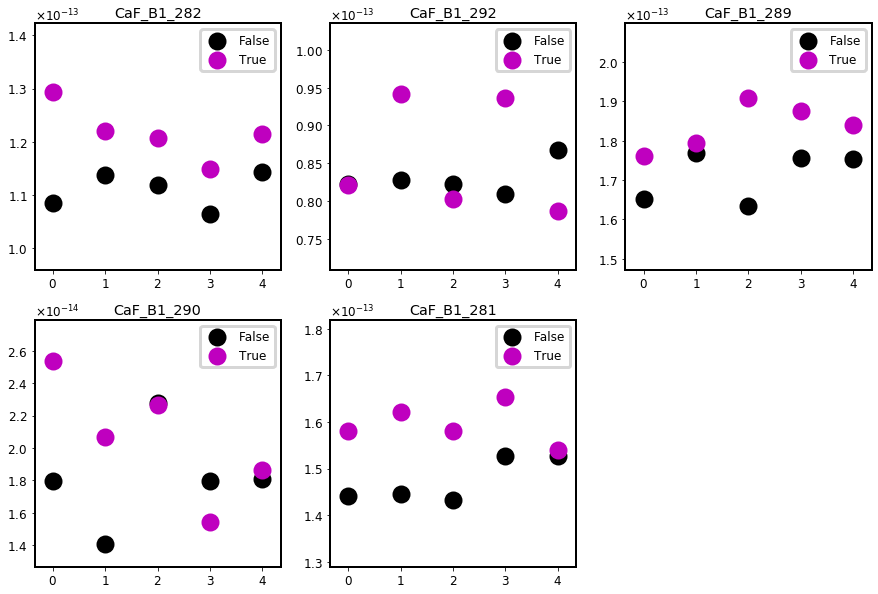

In [13]:
plot_bleach("CaF", 350, (600, 660))

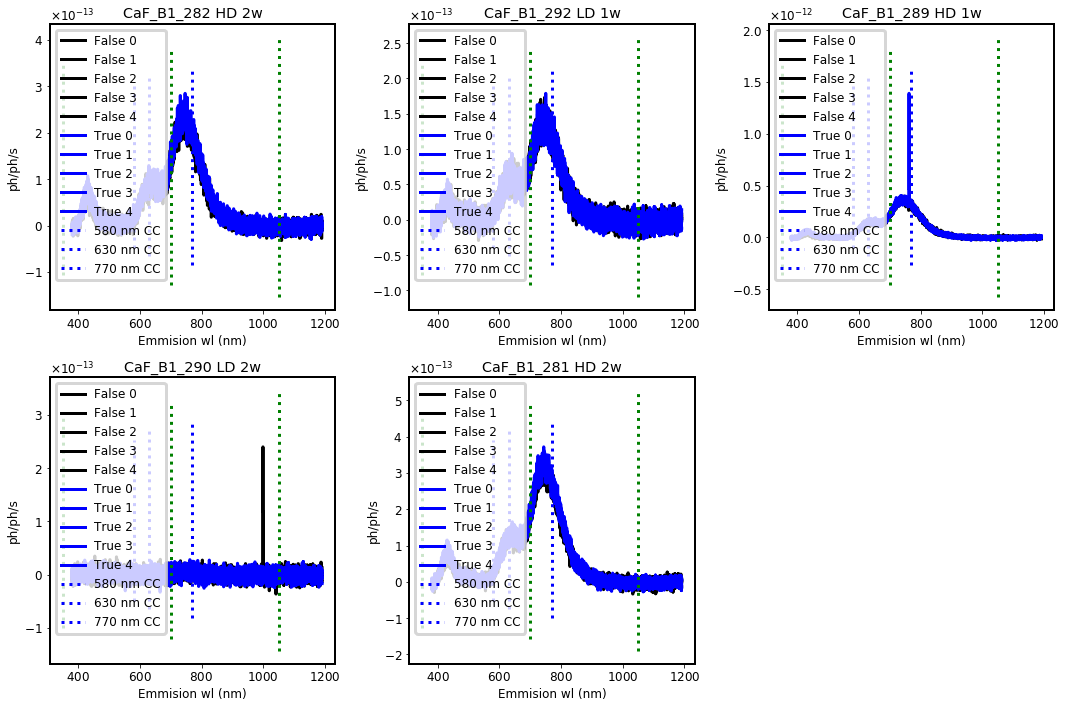

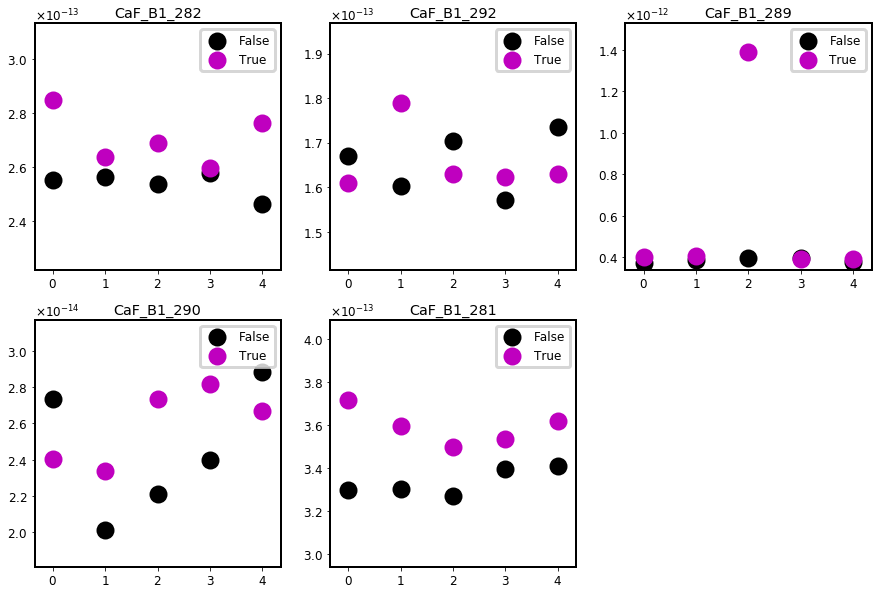

In [14]:
plot_bleach("CaF", 350, (650, 850))

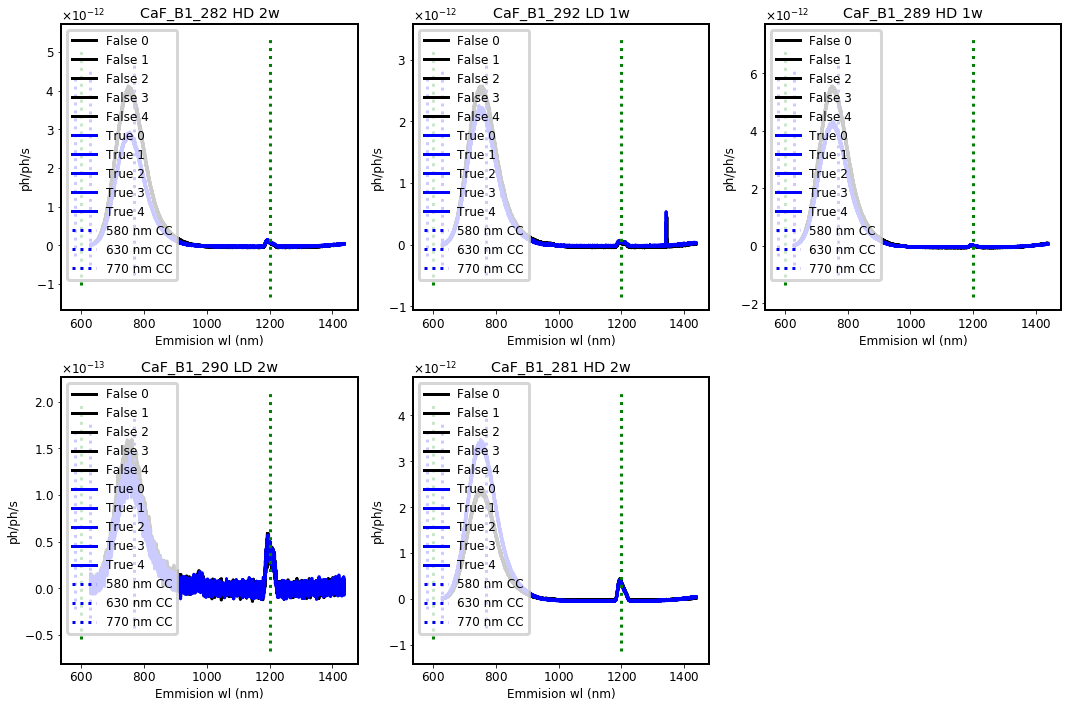

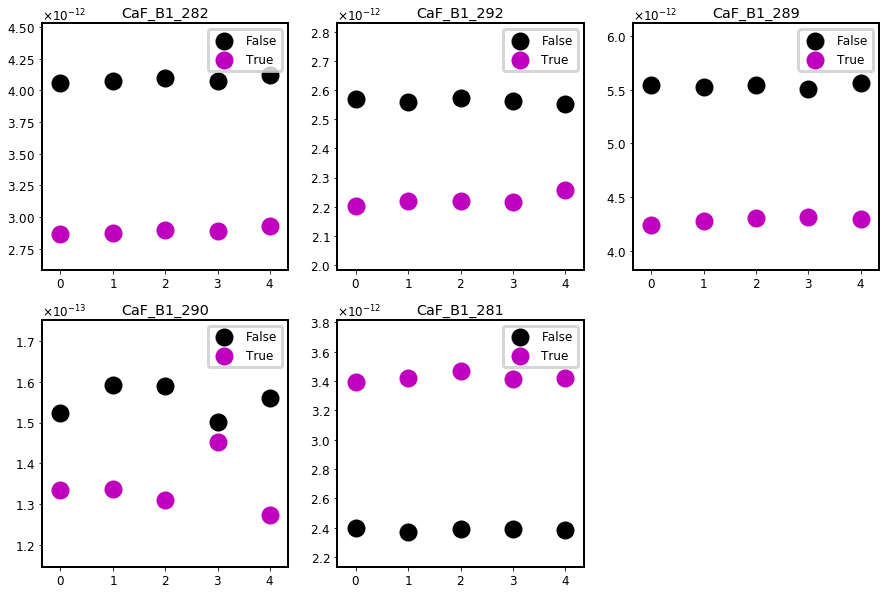

In [15]:
plot_bleach("CaF", 600, (650, 850))